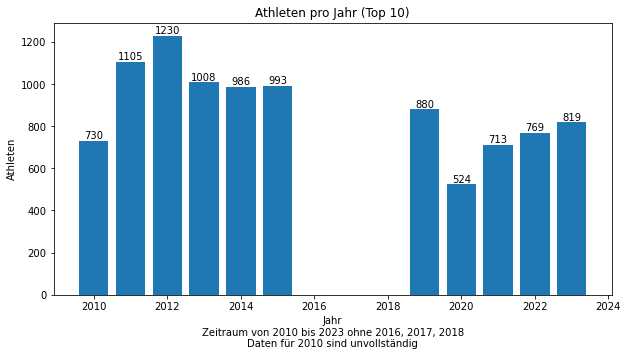

In [14]:
import pandas as pd
import os 
import matplotlib.pyplot as plt

years = [int(file.split('.')[0])
         for file in os.listdir('data') if file.split('.')[0].isnumeric()]

min_year = min(years)
max_year = max(years)
missing_years = [year for year in range(min_year, max_year + 1) if year not in years]
data_range = 'Zeitraum von ' + str(min_year) + ' bis ' + str(max_year) + (' ohne ' + str(missing_years)[1:-1] if len(missing_years) > 0 else '') + '\nDaten für 2010 sind unvollständig'

data = pd.concat([pd.read_csv(f'data/{year}.csv') for year in years])
data = data[data['place'] <= 10]
data['points'] = 11 - data['place']
data['date'] = pd.to_datetime(data['date'], format='%d.%m.%Y')
data['age'] = data['date'].dt.year - data['birthyear']
data['name'] = data['firstname'] + ' ' + data['lastname']
data['year'] = data['date'].dt.year


agg_data = data.groupby(data['date'].dt.year)['athleteId'].nunique()

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(agg_data.index, agg_data.values)
ax.set_xlabel('Jahr' + '\n' + data_range)
ax.set_ylabel('Athleten')
ax.set_title('Athleten pro Jahr (Top 10)')
for i, v in enumerate(agg_data.values):
    ax.text(agg_data.index[i], v, str(v), ha='center', va='bottom')
plt.show()




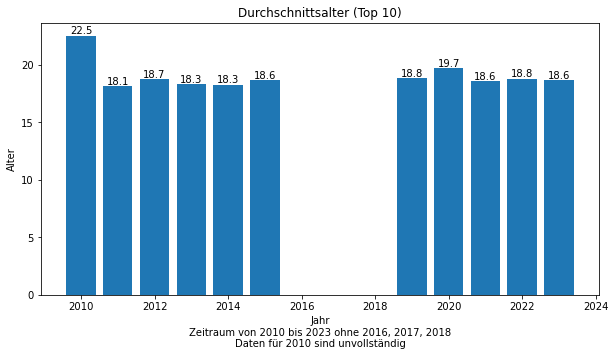

In [15]:
average_age = data[data['birthyear'] > 0]
average_age = average_age.groupby(average_age['date'].dt.year)['age'].mean()
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(average_age.index, average_age.values)
ax.set_xlabel('Jahr' + '\n' + data_range)
ax.set_ylabel('Alter')
ax.set_title('Durchschnittsalter (Top 10)')
for i, v in enumerate(average_age.values):
    ax.text(average_age.index[i], v, str(round(v, 1)), ha='center', va='bottom')
plt.show()

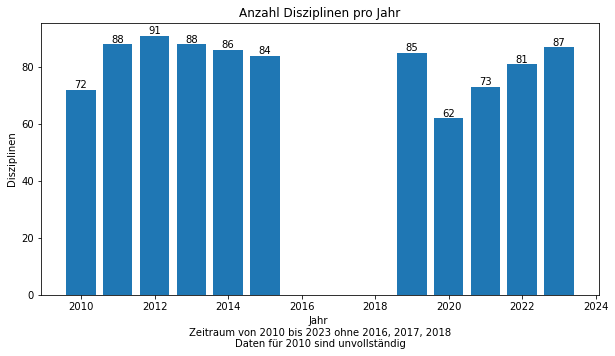

In [16]:
# amount of available disciplines per year
disciplines = data.groupby(data['date'].dt.year)['discipline'].nunique()
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(disciplines.index, disciplines.values)
ax.set_xlabel('Jahr ' + '\n' + data_range)
ax.set_ylabel('Disziplinen')
ax.set_title('Anzahl Disziplinen pro Jahr')
for i, v in enumerate(disciplines.values):
    ax.text(disciplines.index[i], v, str(v), ha='center', va='bottom')
plt.show()


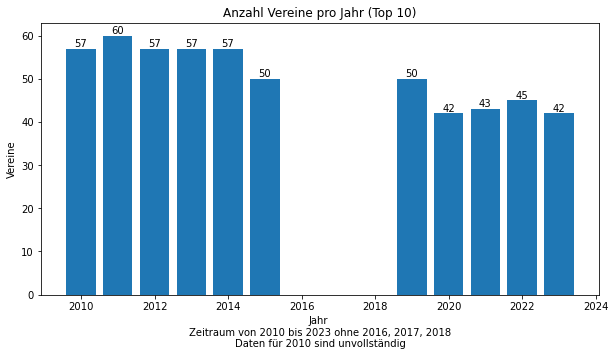

In [17]:
# amount of clubs per year
clubs = data.groupby(data['date'].dt.year)['club'].nunique()
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(clubs.index, clubs.values)
ax.set_xlabel('Jahr ' + '\n' + data_range)
ax.set_ylabel('Vereine')
ax.set_title('Anzahl Vereine pro Jahr (Top 10)')
for i, v in enumerate(clubs.values):
    ax.text(clubs.index[i], v, str(v), ha='center', va='bottom')
plt.show()

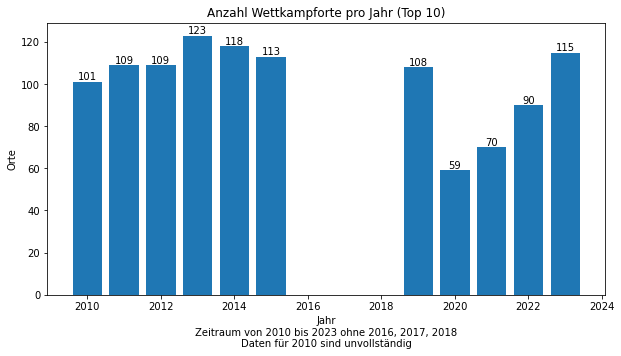

In [18]:
# amount of locations per year
locations = data.groupby(data['date'].dt.year)['location'].nunique()
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(locations.index, locations.values)
ax.set_xlabel('Jahr' + '\n' + data_range)
ax.set_ylabel('Orte')
ax.set_title('Anzahl Wettkampforte pro Jahr (Top 10)')
for i, v in enumerate(locations.values):
    ax.text(locations.index[i], v, str(v), ha='center', va='bottom')
plt.show()

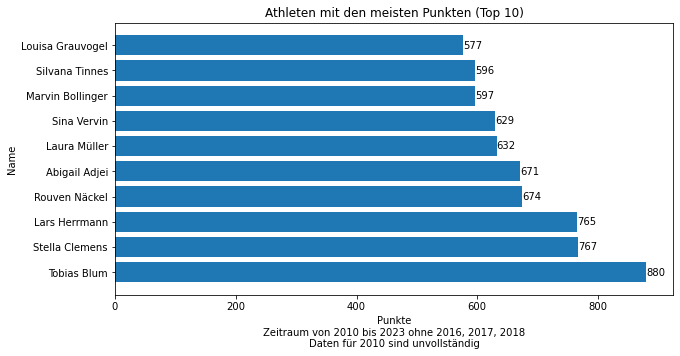

In [19]:
top_athletes = data.groupby(['athleteId', 'firstname', 'lastname'])['points'].sum()
top_athletes = top_athletes.sort_values(ascending=False)[:10]
top_athletes = top_athletes.reset_index()
top_athletes['name'] = top_athletes['firstname'] + ' ' + top_athletes['lastname']
top_athletes = top_athletes.drop(['firstname', 'lastname', 'athleteId'], axis=1)
fig, ax = plt.subplots(figsize=(10, 5))
ax.barh(top_athletes['name'], top_athletes['points'])
ax.set_xlabel('Punkte' + '\n' + data_range)
ax.set_ylabel('Name')
ax.set_title('Athleten mit den meisten Punkten (Top 10)')
for i, v in enumerate(top_athletes['points']):
    ax.text(v, i, str(v), ha='left', va='center')
plt.show()



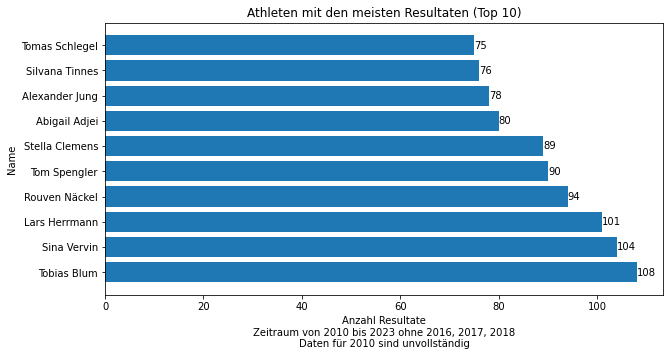

In [20]:
top_athletes = data.groupby(['athleteId', 'firstname', 'lastname'])['points'].count()
top_athletes = top_athletes.sort_values(ascending=False)[:10]
top_athletes = top_athletes.reset_index()
top_athletes['name'] = top_athletes['firstname'] + ' ' + top_athletes['lastname']
top_athletes = top_athletes.drop(['firstname', 'lastname', 'athleteId'], axis=1)
fig, ax = plt.subplots(figsize=(10, 5))
ax.barh(top_athletes['name'], top_athletes['points'])
ax.set_xlabel('Anzahl Resultate\n' + data_range)
ax.set_ylabel('Name')
ax.set_title('Athleten mit den meisten Resultaten (Top 10)')
for i, v in enumerate(top_athletes['points']):
    ax.text(v, i, str(v), ha='left', va='center')
plt.show()



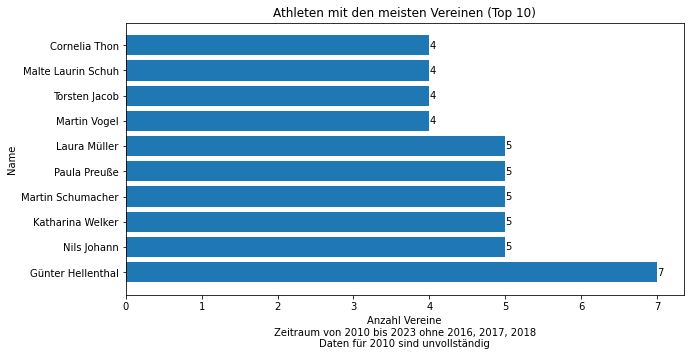

In [21]:
top_athletes = data.groupby(['athleteId', 'firstname', 'lastname'])['club'].nunique()
top_athletes = top_athletes.sort_values(ascending=False)[:10]
top_athletes = top_athletes.reset_index()
top_athletes['name'] = top_athletes['firstname'] + ' ' + top_athletes['lastname']
top_athletes = top_athletes.drop(['firstname', 'lastname', 'athleteId'], axis=1)
fig, ax = plt.subplots(figsize=(10, 5))
ax.barh(top_athletes['name'], top_athletes['club'])
ax.set_xlabel('Anzahl Vereine\n' + data_range)
ax.set_ylabel('Name')
ax.set_title('Athleten mit den meisten Vereinen (Top 10)')
for i, v in enumerate(top_athletes['club']):
    ax.text(v, i, str(v), ha='left', va='center')
plt.show()


## Athleten mit den meisten Punkten pro Jahr

In [22]:
top_athletes = data
top_athletes = top_athletes.groupby(['year', 'athleteId', 'name', 'birthyear'])['points'].sum()
top_athletes = top_athletes.sort_values(ascending=False).reset_index()
top_athletes['age'] = top_athletes['year'] - top_athletes['birthyear']
top_athletes = top_athletes.groupby('year').first()
top_athletes = top_athletes.reset_index()
top_athletes = top_athletes.drop(['athleteId'], axis=1)
top_athletes.rename(columns={'year': 'Jahr', 'name': 'Athlet', 'points': 'Punkte', 'age': 'Alter', 'birthyear': "Jahrgang"}, inplace=True)
display(top_athletes)

,Jahr,Athlet,Jahrgang,Punkte,Alter
0,2010,Tobias Blum,1995,200,15
1,2011,Max Seyler,1998,210,13
2,2012,Robin Gutendorf,1997,187,15
3,2013,Lara Latz,2000,159,13
4,2014,Jonas Freyler,2001,176,13
5,2015,Philipp Oehling,2001,194,14
6,2019,Samuel Sleet,2006,145,13
7,2020,Charlotte Comtesse,2006,106,14
8,2021,Aaron Hoffmann,2007,167,14
9,2022,Aaron Hoffmann,2007,161,15


## Disziplin mit den wenigsten Athleten pro Jahr in einer Altersklasse

In [23]:
male_active = data[data['ageGroup'] == 'MU20']
disciplines = male_active.groupby(['year', 'discipline'])['athleteId'].nunique()
disciplines = disciplines.reset_index()
disciplines = disciplines.sort_values(by='athleteId')
disciplines = disciplines.groupby('year').first()
disciplines = disciplines.reset_index()
disciplines.rename(columns={'year': 'Jahr', 'discipline': 'Disziplin'}, inplace=True)
display(disciplines)



,Jahr,Disziplin,athleteId
0,2011,2000 m Hindernis,1
1,2012,3000 m Lauf,2
2,2013,3000 m Lauf,1
3,2014,2000 m Hindernis,1
4,2015,10000 m Lauf,1
5,2019,10-Kampf,1
6,2020,400 m Hürden 0.914m,1
7,2021,400 m Hürden 0.914m,1
8,2022,1000 m Lauf,1
9,2023,10-Kampf,1


## Häufigkeit von Vorname und Nachnamen pro Jahr

In [24]:
data_org = data
data = data.drop_duplicates(subset=['athleteId', 'year'])
firstnames = data.groupby(['year', 'firstname'])['firstname'].count().reset_index(name='count')
lastnames = data.groupby(['year', 'lastname'])['lastname'].count().reset_index(name='count')
firstnames = firstnames.sort_values(by=['year', 'count'], ascending=False)
lastnames = lastnames.sort_values(by=['year', 'count'], ascending=False)
firstnames = firstnames.groupby('year').first()
lastnames = lastnames.groupby('year').first()
firstnames = firstnames.reset_index()
lastnames = lastnames.reset_index()
most_common_names = pd.merge(firstnames, lastnames, on='year')
most_common_names.rename(columns={'year': 'Jahr', 'firstname': 'Vorname', 'count_x': 'Anzahl Vorname', 'lastname': 'Nachname', 'count_y': 'Anzahl Nachname'}, inplace=True)
cols = list(most_common_names.columns.values)
cols.remove('Anzahl Vorname')
cols.remove('Anzahl Nachname')
cols.append('Anzahl Vorname')
cols.append('Anzahl Nachname')
most_common_names = most_common_names[cols]
display(most_common_names)
data = data_org

,Jahr,Vorname,Nachname,Anzahl Vorname,Anzahl Nachname
0,2010,Christian,Müller,13,11
1,2011,Michael,Becker,15,13
2,2012,Julia,Müller,17,15
3,2013,Christian,Müller,15,16
4,2014,Julia,Müller,13,12
5,2015,Tobias,Müller,12,16
6,2019,Laura,Schmitt,12,15
7,2020,Hannah,Müller,7,9
8,2021,Anna,Schmitt,11,13
9,2022,Anna,Schmitt,9,15


## Häufigkeit von weiblichen Vorname und Nachnamen pro Jahr

In [25]:
data['gender'] = data['ageGroup'].str[0].replace('F', 'W')
data_org = data
data = data[data['gender'] == 'W']
data = data.drop_duplicates(subset=['athleteId', 'year'])
firstnames = data.groupby(['year', 'firstname'])['firstname'].count().reset_index(name='count')
lastnames = data.groupby(['year', 'lastname'])['lastname'].count().reset_index(name='count')
firstnames = firstnames.sort_values(by=['year', 'count'], ascending=False)
lastnames = lastnames.sort_values(by=['year', 'count'], ascending=False)
firstnames = firstnames.groupby('year').first()
lastnames = lastnames.groupby('year').first()
firstnames = firstnames.reset_index()
lastnames = lastnames.reset_index()
most_common_names = pd.merge(firstnames, lastnames, on='year')
most_common_names.rename(columns={'year': 'Jahr', 'firstname': 'Vorname', 'count_x': 'Anzahl Vorname', 'lastname': 'Nachname', 'count_y': 'Anzahl Nachname'}, inplace=True)
cols = list(most_common_names.columns.values)
cols.remove('Anzahl Vorname')
cols.remove('Anzahl Nachname')
cols.append('Anzahl Vorname')
cols.append('Anzahl Nachname')
most_common_names = most_common_names[cols]
display(most_common_names)
data = data_org

,Jahr,Vorname,Nachname,Anzahl Vorname,Anzahl Nachname
0,2010,Julia,Müller,9,8
1,2011,Anna,Becker,14,6
2,2012,Julia,Schneider,17,7
3,2013,Lisa,Klein,15,6
4,2014,Julia,Klein,13,5
5,2015,Annika,Klein,10,8
6,2019,Laura,Schmitt,12,8
7,2020,Hannah,Schmitt,7,6
8,2021,Anna,Schmitt,11,9
9,2022,Anna,Schmitt,9,10


## Häufigkeit von männlichen Vorname und Nachnamen pro Jahr

In [26]:
data['gender'] = data['ageGroup'].str[0].replace('F', 'W')
data_org = data
data = data[data['gender'] == 'M']
data = data.drop_duplicates(subset=['athleteId', 'year'])
firstnames = data.groupby(['year', 'firstname'])['firstname'].count().reset_index(name='count')
lastnames = data.groupby(['year', 'lastname'])['lastname'].count().reset_index(name='count')
firstnames = firstnames.sort_values(by=['year', 'count'], ascending=False)
lastnames = lastnames.sort_values(by=['year', 'count'], ascending=False)
firstnames = firstnames.groupby('year').first()
lastnames = lastnames.groupby('year').first()
firstnames = firstnames.reset_index()
lastnames = lastnames.reset_index()
most_common_names = pd.merge(firstnames, lastnames, on='year')
most_common_names.rename(columns={'year': 'Jahr', 'firstname': 'Vorname', 'count_x': 'Anzahl Vorname', 'lastname': 'Nachname', 'count_y': 'Anzahl Nachname'}, inplace=True)
cols = list(most_common_names.columns.values)
cols.remove('Anzahl Vorname')
cols.remove('Anzahl Nachname')
cols.append('Anzahl Vorname')
cols.append('Anzahl Nachname')
most_common_names = most_common_names[cols]
display(most_common_names)
data = data_org

,Jahr,Vorname,Nachname,Anzahl Vorname,Anzahl Nachname
0,2010,Christian,Klein,12,6
1,2011,Michael,Müller,15,8
2,2012,Christian,Müller,15,12
3,2013,Christian,Müller,15,12
4,2014,Tobias,Müller,13,7
5,2015,Tobias,Müller,12,10
6,2019,Michael,Müller,11,8
7,2020,David,Becker,6,4
8,2021,Michael,Becker,9,7
9,2022,Michael,Becker,9,7
